In [24]:
# How to install graphic libraries: 
# conda install graphviz
# Then python-library for graphviz: 
# conda install python-graphviz

import numpy as np 
import pandas as pd 
from sklearn import tree
import graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading data

In [25]:
df_train = pd.read_csv("ise crashing.csv", delimiter = ';')
df_test = pd.read_csv("ise crashing test.csv", delimiter = ';')

In [26]:
# Checking that the dataset is correctly loaded
# df_train.columns
df_train.head(10)

,Snapshots enabled in VM,Hard drive utilization (%),Cache utilization (%),All personas enabled,Requirements not met,Server crashes
0,0,95,33,0,0,0
1,1,81,50,1,1,1
2,0,97,100,1,0,1
3,0,34,78,1,1,0
4,1,27,95,0,0,1
5,0,80,56,0,0,0
6,0,67,88,0,1,1
7,1,78,70,1,0,1
8,0,59,65,0,0,0
9,0,23,55,0,0,0


In [27]:
# # Preparing the training dataset
X_train = df_train.drop(['Server crashes'], axis = 1)  
y_train = df_train['Server crashes']
X_test = df_test.drop(['Server crashes'], axis = 1)
y_test = df_test['Server crashes']

# Modeling

In [28]:
# Training the tree 
decision_tree = tree.DecisionTreeClassifier()

# Making predictions
decision_tree = decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

Print accuracy and characteristics of the model

In [29]:
print(accuracy_score(y_test, y_pred))

0.8


In [30]:
print(decision_tree.feature_importances_)

[0.57142857 0.         0.42857143 0.         0.        ]


In [31]:
X_train.columns

Index(['Snapshots enabled in VM', 'Hard drive utilization (%)',
       'Cache utilization (%)', 'All personas enabled',
       'Requirements not met'],
      dtype='object')

In [32]:
print(decision_tree.n_classes_)

2


In [33]:
print(decision_tree.score)

<bound method ClassifierMixin.score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>


In [34]:
print(decision_tree.predict_proba(X_test))

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [35]:
confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)

array([[1, 0],
       [1, 3]])

<img src="confusion matrix.png" style="height:150px"> 

# Plotting

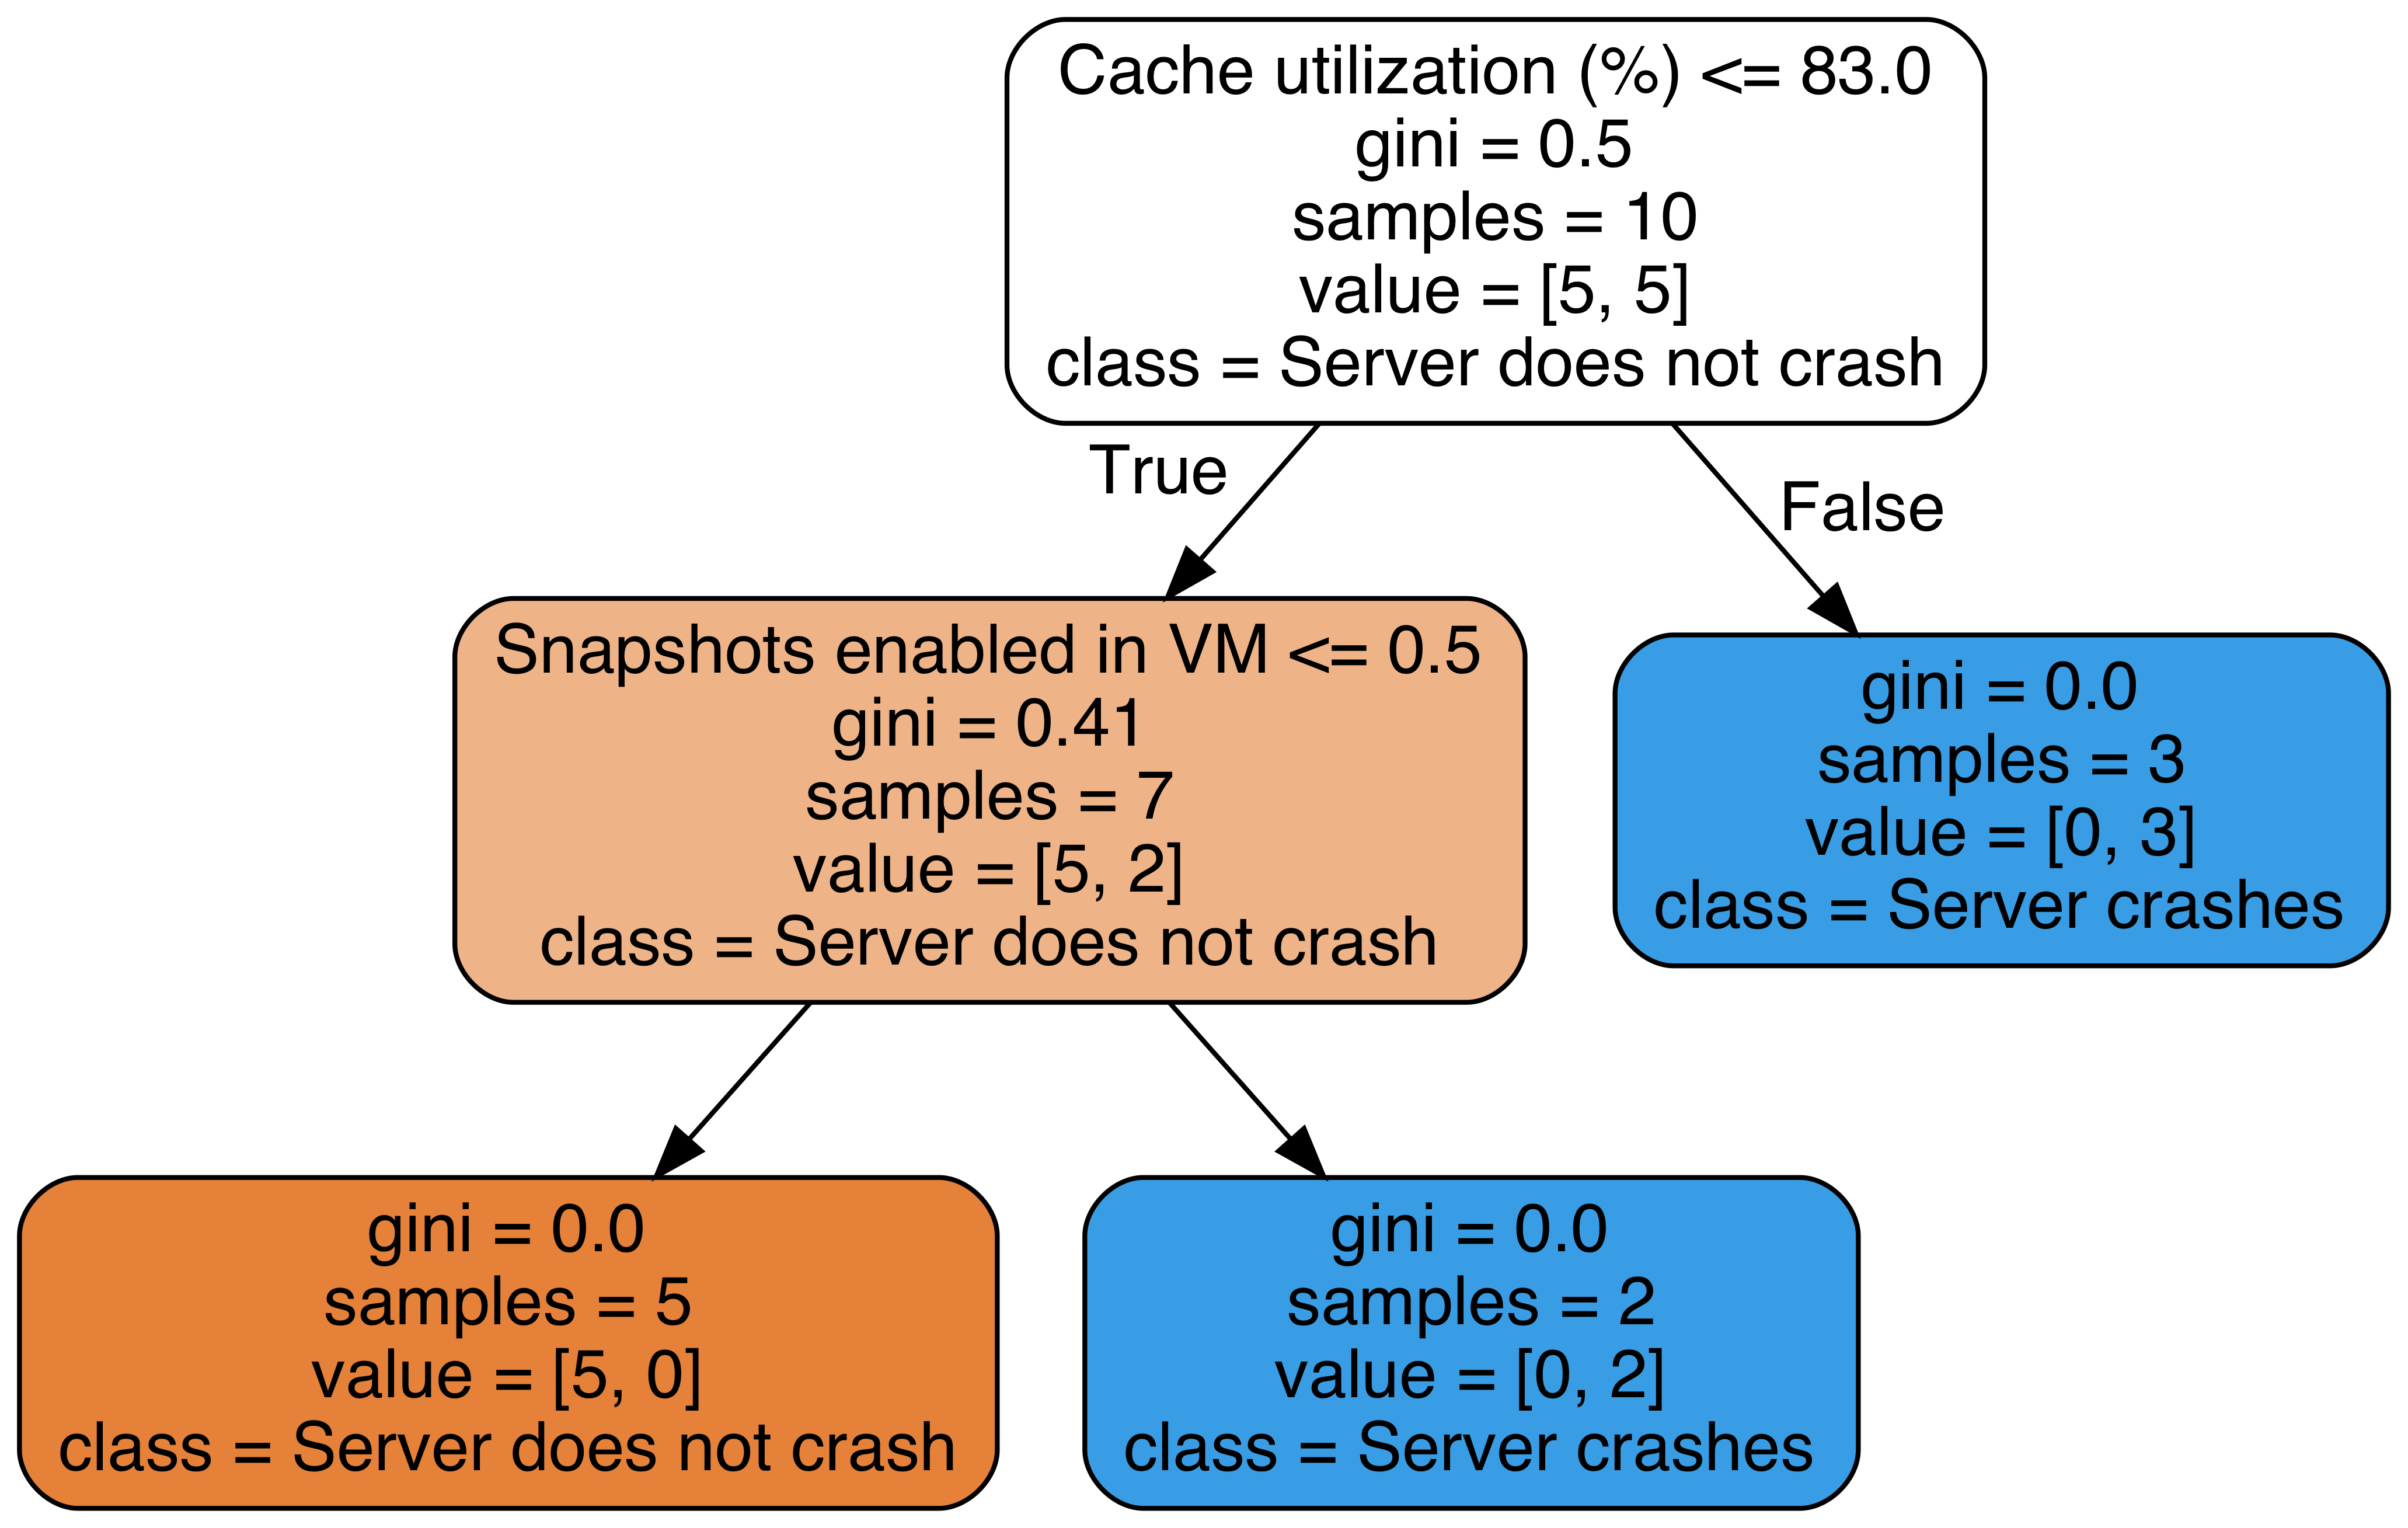

In [36]:
# Parameters that we will pass to the library that draws the tree, to make it understandable
features = list(X_train)
target_names = ['Server does not crash', 'Server crashes']
               
# Create DOT data               
dot_data = tree.export_graphviz(decision_tree, out_file = 'tree.dot', feature_names = features, \
                                class_names = target_names, precision = 2, filled = True, rounded = True)

# Convert to png using system command hdddrequires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'ISEtree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'ISEtree.png')